In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
from tensorflow.keras.preprocessing import sequence
import numpy as np
#!pip install torch
import pandas as pd
import numpy as np
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

## Load Data

In [3]:
from io import BytesIO

import requests
import pandas as pd
#r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
#data = r.content
dataset = pd.read_excel('E:\Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/All Dataset\Prepocessed (3).xlsx', dtype=str, index_col=None)
#dataset = pd.read_excel(data, 'Prepocessed (3)')
dataset

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Asiyah\AppData\Local\Temp\ipykernel_4908\4022682437.py:7: SyntaxWarning: invalid escape sequence '\A'
  dataset = pd.read_excel('E:\Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/All Dataset\Prepocessed (3).xlsx', dtype=str, index_col=None)


,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

# Encode Label

In [4]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['labels'] = labelencoder.fit_transform(dataset['label-berita'])
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

## Mencari num_words terbaik

In [5]:
from collections import Counter

# Gabungkan semua teks menjadi satu string besar
all_text = ' '.join(dataset['content_lemma'])

# Hitung frekuensi kata
word_freq = Counter(all_text.split())

# Urutkan kata berdasarkan frekuensi (dari yang paling sering hingga yang paling jarang)
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Lihat 10 kata teratas untuk mendapatkan ide
print(word_freq_sorted[:10])

[('yang', 5150), ('dan', 4368), ('di', 3616), ('dengan', 2743), ('untuk', 2479), ('ini', 1984), ('dari', 1613), ('dalam', 1393), ('itu', 1261), ('juga', 1252)]


## Menentukan max_len terbaik
dengan Percentile

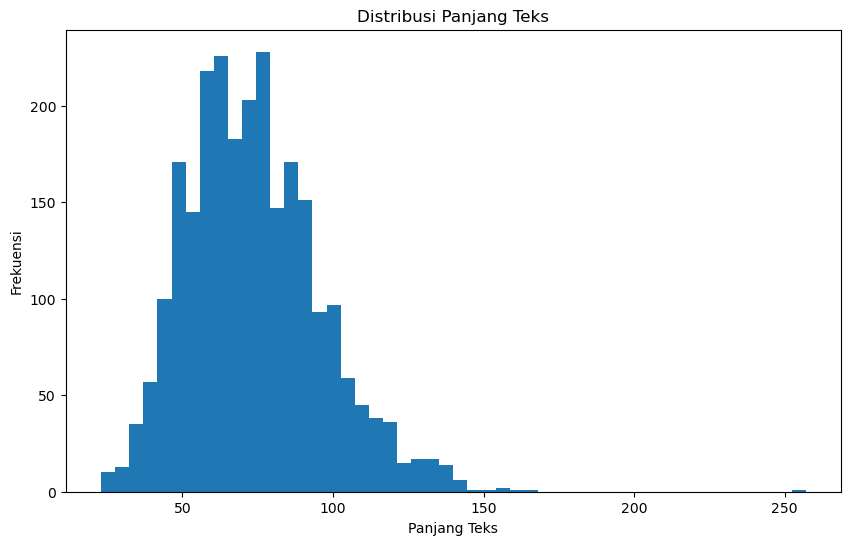

In [6]:
import matplotlib.pyplot as plt

# Hitung panjang teks untuk setiap dokumen
text_lengths = dataset['content_lemma'].apply(lambda x: len(x.split()))

# Visualisasikan distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()

In [7]:
# Menemukan nilai max_len berdasarkan persentil
max_len = np.percentile(text_lengths, 100)
max_len

257.0

# Split Data

In [8]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [9]:
from sklearn.model_selection import KFold
#KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
  #  print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   X_train, X_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

In [10]:
#Y = dataset['labels']
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2002,) (2002,)
(500,) (500,)


In [11]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

#tidaklah tepat karena fungsi ini mengubah label menjadi format one-hot encoding yang lebih cocok untuk klasifikasi multi-kelas di mana setiap sampel hanya termasuk dalam satu kelas.

# GloVe

In [15]:
import codecs

# Step 1: Load Pretrained GloVe Embeddings
# Path ke file pre-trained GloVe (misalnya glove.6B.300d.txt untuk model 300d)
embedding_index = {}
embedding_file = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings/glove.6B.300d.txt'  # Ganti dengan path file GloVe Indonesia yang kamu download

# Membaca file GloVe dan mengonversi ke dictionary
with open(embedding_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector


# f = codecs.open('E:\Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings\glove.6B.300d.txtt', encoding='utf-8')
# #f = codecs.open('/content/drive/MyDrive/Pre-trained Embeddings/glove.6B.300d.txt', encoding='utf-8')
# for line in f:
#     values = line.rstrip().rsplit(" ")
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype="float32")
#     embeddings_index[word] = coefs
# f.close()

In [16]:
# Step 2: Tokenize your text data (assuming `X_train` and `X_test` are your text datasets)
max_features = 10000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(texts)  # Hanya fit ke X_train untuk mencegah data leakage

# Convert text to sequence of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [18]:
# Step 3: Pad sequences so that they have the same length
max_length = 257  # asumsi maksimal panjang sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print(X_train_pad.shape)
print(X_test_pad.shape)

(2002, 257)
(500, 257)


In [20]:
# Step 4: Create an embedding matrix based on the GloVe vectors
words_not_found = []
embed_dim = 300
vocab_size = len(tokenizer.index_word)+1
embedding_matrix = np.zeros((vocab_size, embed_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 4928


In [ ]:
# Step 1: Menyimpan embedding matrix
filename_npy = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings/glove_SVM_embedding.npy'
#filename_npy = '/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /Embedding Models/glove300_embedding.npy'
# Simpan embedding matrix ke dalam file .npy
np.save(filename_npy, embedding_matrix)

print(f"Embedding matrix saved to {filename_npy}")

## Split Word Embedding to Training-Testing

In [21]:
# # Convert training and testing data to vectors using the word embeddings
X_train_embed = embedding_matrix[X_train_pad]
X_test_embed = embedding_matrix[X_test_pad]

# SVM

In [23]:
#Langkah 1: Menghitung rata-rata vektor kata untuk setiap dokumen
# Model seperti SVM mengharuskan data inputnya dalam bentuk vektor berdimensi tetap. Namun, teks bisa memiliki 
#panjang yang bervariasi (misalnya, kalimat yang lebih pendek atau lebih panjang).
#Setiap kata dalam teks memiliki vektor yang diperoleh dari model seperti FastText. Tapi jika kita ingin mewakili 
#seluruh kalimat atau paragraf dengan satu vektor, kita perlu cara untuk menggabungkan vektor-vektor kata tersebut menjadi satu vektor representasi yang tetap ukurannya.
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fungsi untuk menghitung rata-rata vektor kata untuk setiap kalimat
def get_average_word_vector(X, tokenizer, embedding_index, embedding_dim=300):
    # Hasil rata-rata vektor untuk setiap dokumen
    document_vectors = []
    for sequence in X:
        word_vectors = []
        for idx in sequence:
            word = tokenizer.index_word.get(idx)
            if word in embedding_index:
                word_vectors.append(embedding_index[word])
        if word_vectors:
            document_vectors.append(np.mean(word_vectors, axis=0))  # Rata-rata vektor kata
        else:
            document_vectors.append(np.zeros(embedding_dim))  # Jika tidak ada kata yang cocok
    return np.array(document_vectors)

# Mendapatkan rata-rata vektor untuk X_train_pad dan X_test_pad
X_train_vectors = get_average_word_vector(X_train_pad, tokenizer, embedding_index)
X_test_vectors = get_average_word_vector(X_test_pad, tokenizer, embedding_index)

# Menyiapkan label untuk klasifikasi (misal binary classification)
# Jika y_train dan y_test dalam bentuk one-hot encoding, ubah ke bentuk 1D
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Pastikan sekarang y_train dan y_test dalam bentuk 1D
print(y_train.shape)  # Harus (n_samples,)
print(y_test.shape)   # Harus (n_samples,)

(2002,)
(500,)


In [24]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# y_train_dl = tf.keras.utils.to_categorical(y_train)
# y_test_dl = tf.keras.utils.to_categorical(y_test)

#Train the model using the training sets
clf.fit(X_train_vectors, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_vectors)

# Get Evaluation Score

In [27]:
yhat = clf.predict(X_test_vectors)
# classes_x=np.rint(yhat)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Misalnya, yhat adalah hasil prediksi yang berupa string
# Konversi hasil prediksi dan label ke format numerik
encoder = LabelEncoder()
y_pred_numeric = encoder.fit_transform(yhat)  # Mengonversi hasil prediksi menjadi angka

# Mengonversi y_test jika diperlukan (jika label y_test juga berupa string)
y_test_numeric = encoder.transform(y_test)  # Mengonversi y_test ke angka

# Evaluasi model dengan akurasi
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print(f"Akurasi model: {accuracy:.4f}")

# Evaluasi lebih lanjut menggunakan classification report
print(classification_report(y_test_numeric, y_pred_numeric))

Akurasi model: 0.8880
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       228
           1       0.89      0.91      0.90       272

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test_numeric, y_pred_numeric,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_test_numeric, y_pred_numeric))

Precision :  0.8879382980102405
Recall    :  0.886061661506708
F-score   :  0.8868686868686868
Accuracy :  0.888


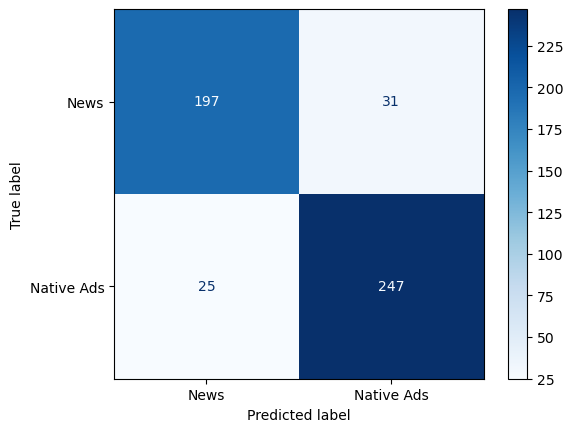

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["News", "Native Ads"]

cm = confusion_matrix(y_test_numeric, y_pred_numeric)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

# ROC

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


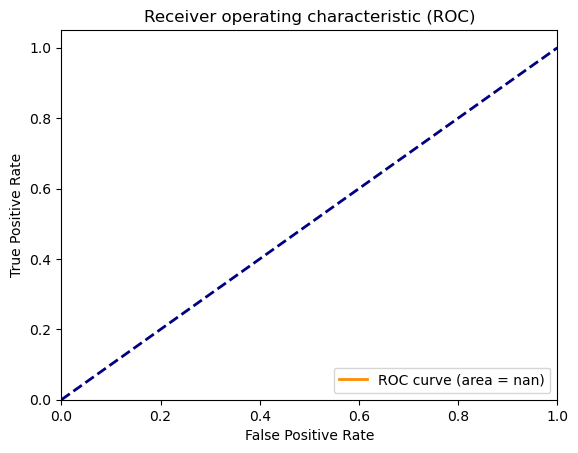

In [30]:
import numpy as np
from sklearn import metrics

y = np.array(y_test_numeric)

scores = np.array(y_pred_numeric)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_numeric, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_pred_numeric)
auc_rf = auc(fpr_rf, tpr_rf)

In [32]:
auc_rf

0.8860616615067081

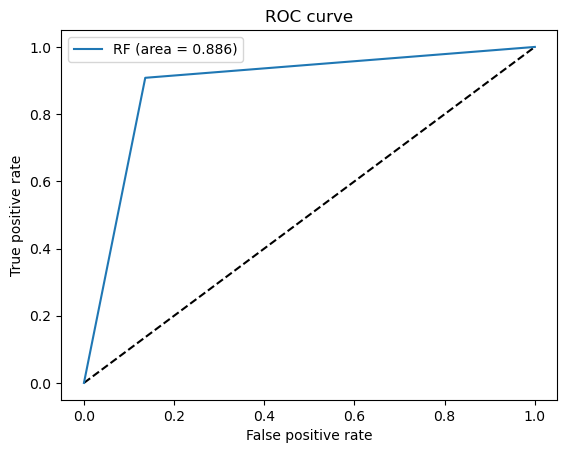

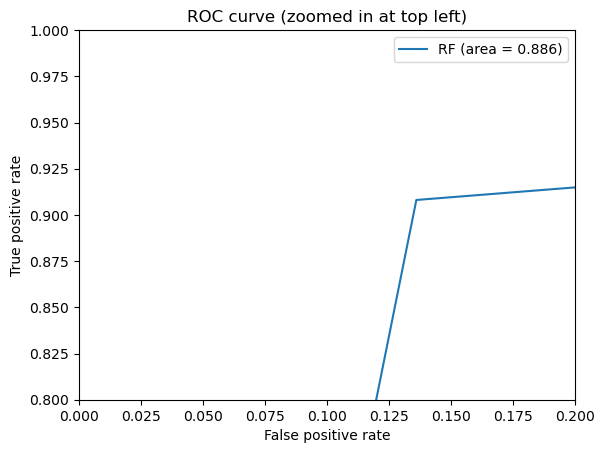

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [34]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_test_numeric, y_pred_numeric)

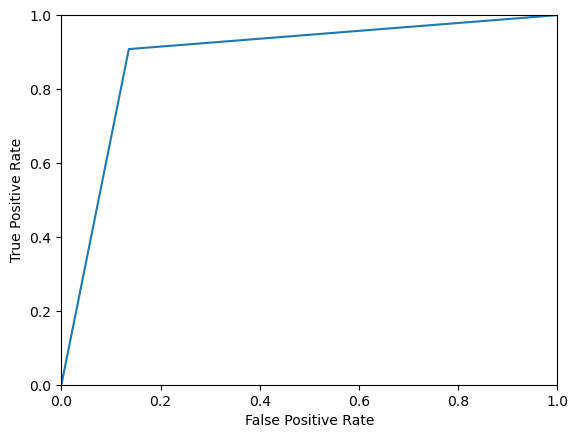

In [36]:
plot_roc_curve (fpr,tpr)

In [37]:
roc_auc_score(y_test_numeric, y_pred_numeric)

0.8860616615067081

0.8860616615067081


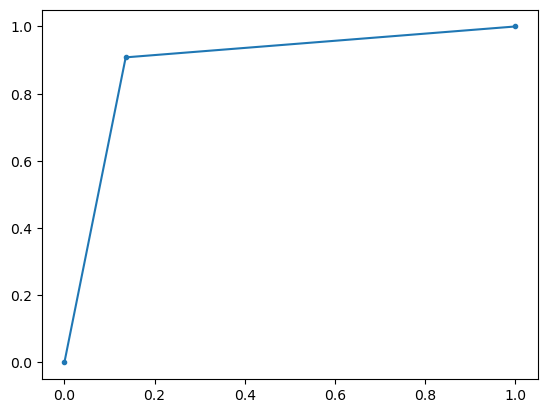

In [38]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_numeric, y_pred_numeric)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [39]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [40]:
perf_measure(y_test_numeric, y_pred_numeric)

(247, 31, 197, 25)

In [41]:
acc = history.history['balanced_accuracy']
val_acc = history.history['val_balanced_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

# Menampilkan Data Salah Prediksi

In [42]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return(TP, FP, TN, FN, FP_indices, FN_indices)

In [43]:
perf_measure(y_test_numeric, y_pred_numeric)

(247,
 31,
 197,
 25,
 [275,
  282,
  296,
  350,
  356,
  363,
  390,
  410,
  421,
  427,
  428,
  433,
  434,
  439,
  442,
  443,
  444,
  445,
  446,
  447,
  448,
  453,
  454,
  459,
  460,
  475,
  477,
  478,
  486,
  491,
  494],
 [31,
  98,
  105,
  138,
  172,
  202,
  203,
  209,
  212,
  213,
  214,
  220,
  225,
  226,
  230,
  232,
  233,
  235,
  243,
  244,
  248,
  259,
  263,
  269,
  270])

In [44]:
# Calculate the performance metrics and retrieve indices for FP and FN
TP, FP, TN, FN, FP_indices, FN_indices = perf_measure(y_test_numeric, y_pred_numeric)

# Select the FP and FN data from the dataset
FP_data = dataset.iloc[FP_indices][['id-berita', 'url', 'content per paragraf']]
FN_data = dataset.iloc[FN_indices][['id-berita', 'url', 'content per paragraf']]

In [46]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
    id-berita                                                url  \
275       268  https://tekno.sindonews.com/read/683585/776/re...   
282       268  https://tekno.sindonews.com/read/683585/776/re...   
296       269  https://tekno.sindonews.com/read/673687/776/ep...   
350       275  https://tekno.sindonews.com/read/635979/776/yu...   
356       276  https://tekno.sindonews.com/read/628343/776/op...   
363       277  https://tekno.sindonews.com/read/625267/776/xi...   
390       278  https://tekno.sindonews.com/read/624421/776/as...   
410       281  https://tekno.sindonews.com/read/605785/776/di...   
421       282  https://tekno.sindonews.com/read/604305/776/re...   
427       283  https://tekno.sindonews.com/read/601229/776/sp...   
428       283  https://tekno.sindonews.com/read/601229/776/sp...   
433       283  https://tekno.sindonews.com/read/601229/776/sp...   
434       283  https://tekno.sindonews.com/read/601229/776/sp...   
439       284  https://tek

In [45]:
import os
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/SVM/'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_Data_GloVe-SVM-Biner.csv')
fn_file_path = os.path.join(folder_path, 'FN_Data_GloVe-SVM-Biner.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)